In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [14]:
df = pd.read_csv(r"C:\Users\KDP15\Documents\카카오톡 받은 파일\바웰공정데이터(1차데이터).csv")
#df = pd.read_csv(r'C:\Users\KDP15\Downloads\KNN 전처리(1).csv')
#df = pd.read_csv(r"C:\Users\KDP15\Downloads\data2.csv")

In [15]:
# df.replace(0, np.nan, inplace=True)
# df.dropna(inplace=True)

In [16]:
data=df[['c_temp_pv','k_rpm_pv','n_temp_pv','scale_pv','s_temp_pv']]

In [17]:
data=data[(2.54 <= data['scale_pv']) & (data['scale_pv'] <= 3.49) & (data['k_rpm_pv']>40)]

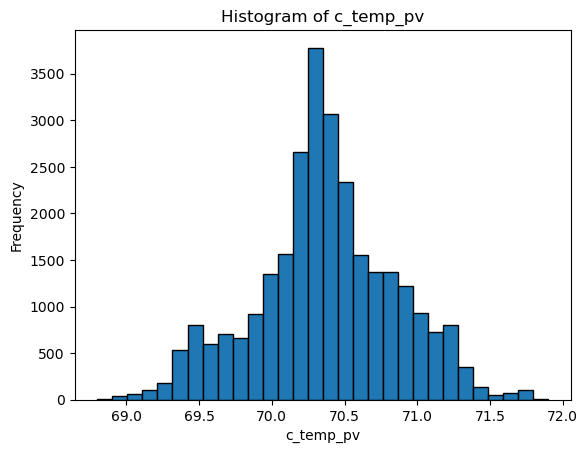

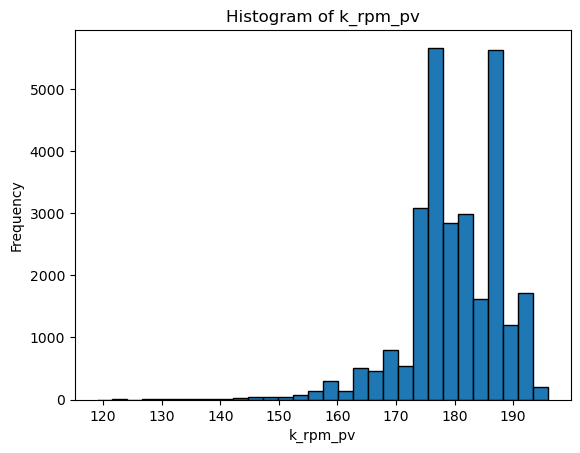

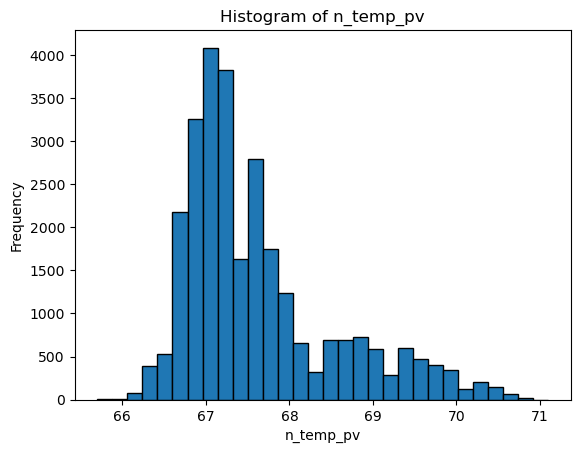

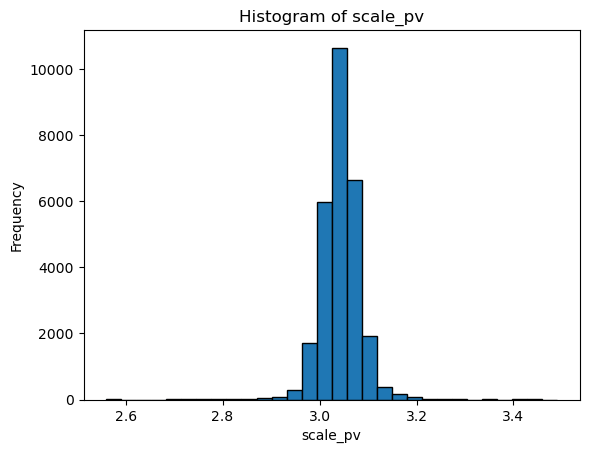

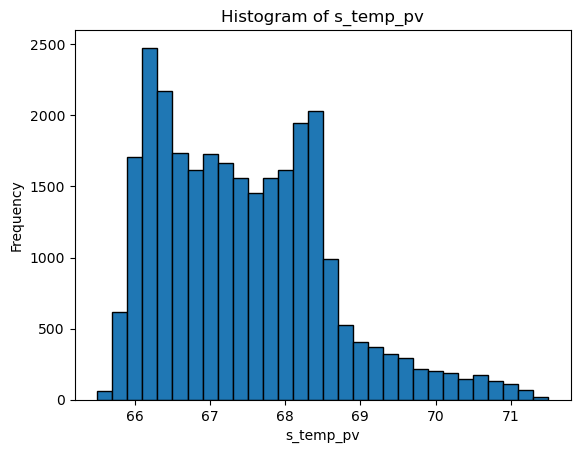

In [18]:
for column in data.columns:
    plt.figure()
    plt.hist(data[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [19]:
# 모델
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [20]:
X = data[['c_temp_pv','k_rpm_pv','n_temp_pv','s_temp_pv']]
y = data['scale_pv']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [22]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
model =LinearRegression()

In [24]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
import joblib
joblib.dump(model, 'forest_model.pkl')

['forest_model.pkl']

In [ ]:
y_pred = model.predict(X_test)

In [11]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.03410214706170589
0.0390997969809842


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"mae = {mae}")
print(f"mape = {mape*100}%")

mae = 0.028198118997663904
mape = 0.9287421180786409%


In [ ]:
# 모델 관련함수
def run_model(model, scaler , X_train, X_test, y_train, y_test):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = model.score(X_test_scaled,y_test)
    n = X_test.shape[0]  # 샘플 수
    p = X_test.shape[1]  # 피처 수
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


    print(f'model: {model}, scaler : {scaler}')
    print(f'train R2 score : {model.score(X_train_scaled,y_train)}')
    print(f'test  R2 score : {model.score(X_test_scaled,y_test)}')
    print("Adjusted R²:", adjusted_r2)
    print(f"mae = {mae}")
    print(f"mape = {mape*100}%")
    print('*'*40)

In [ ]:
#model=LinearRegression()
#scaler_st=StandardScaler()
#scaler_mm = MinMaxScaler()
#scaler_rb = RobustScaler()
#run_model(model, scaler_st, X_train, X_test, y_train, y_test)
#run_model(model, scaler_mm, X_train, X_test, y_train, y_test)
#run_model(model, scaler_rb, X_train, X_test, y_train, y_test)

In [ ]:
data2=df[['c_temp_pv','k_rpm_pv','n_temp_pv','scale_pv','s_temp_pv']]

In [ ]:
data_nan =data2[(data2['k_rpm_pv']>40)]

In [ ]:
data_nan.loc[~((2.54 <= data_nan['scale_pv']) & (data_nan['scale_pv'] <= 3.49)), 'scale_pv'] = np.nan

In [ ]:
data_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139831 entries, 0 to 143090
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   c_temp_pv  139831 non-null  float64
 1   k_rpm_pv   139831 non-null  int64  
 2   n_temp_pv  139831 non-null  float64
 3   scale_pv   28097 non-null   float64
 4   s_temp_pv  139831 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 6.4 MB


In [ ]:
y_pred = model.predict(np.array([70.6, 180, 69.2, 68.6]).reshape(1, -1))
print(y_pred)

[3.05021792]


c:\Users\KDP15\anaconda3\envs\yesmate\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
data_nan_only = data_nan[data_nan['scale_pv'].isnull()]
X_nan = data_nan_only.drop(columns=['scale_pv'])

# 결측치 예측
y_nan_pred = model.predict(X_nan)

# 예측값으로 결측치 대체
data_nan.loc[data_nan['scale_pv'].isnull(), 'scale_pv'] = y_nan_pred

In [ ]:
data_nan.to_csv('데이터(선형)2733.csv',encoding='utf-8-sig',index=False)